<a href="https://colab.research.google.com/github/NakulSK221B/Brain-Tumor-Detection/blob/main/SDP_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive'


MyDrive


In [5]:
#Give dataset path
train_path = '/content/drive/MyDrive/BrainTumors_Dataset/Training'
test_path = '/content/drive/MyDrive/BrainTumors_Dataset/Testing'

Working with 822 images
Image examples: 
gg (122).jpg


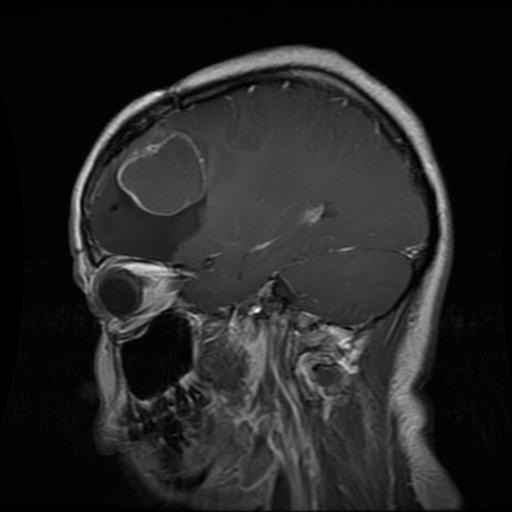

gg (138).jpg


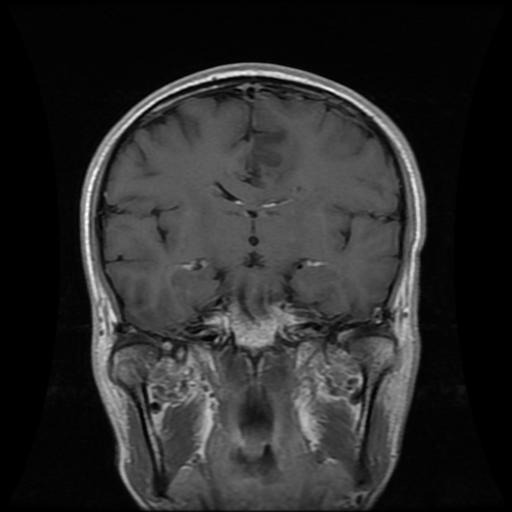

gg (102).jpg


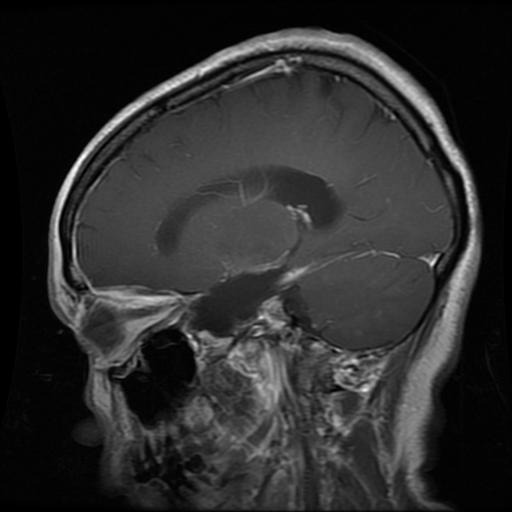

gg (118).jpg


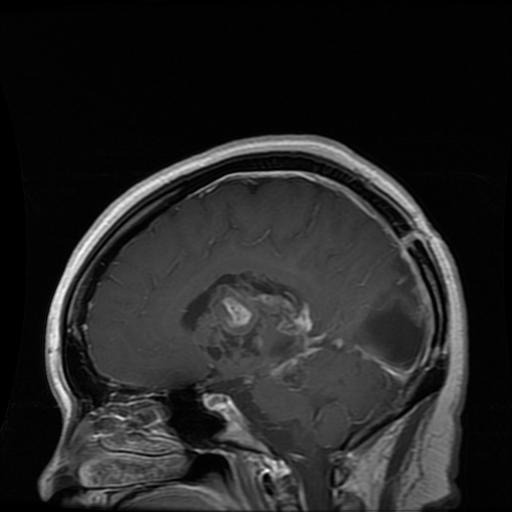

gg (13).jpg


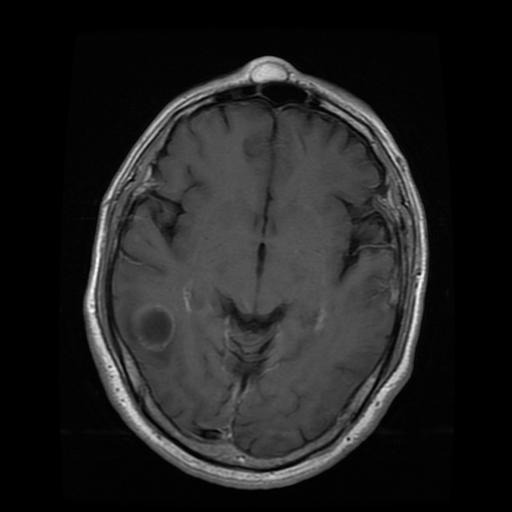

gg (107).jpg


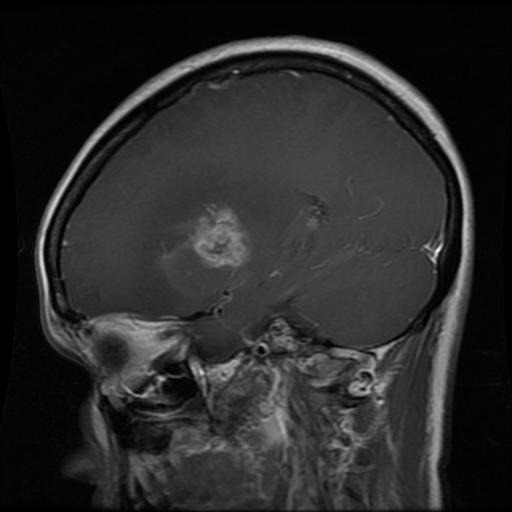

gg (130).jpg


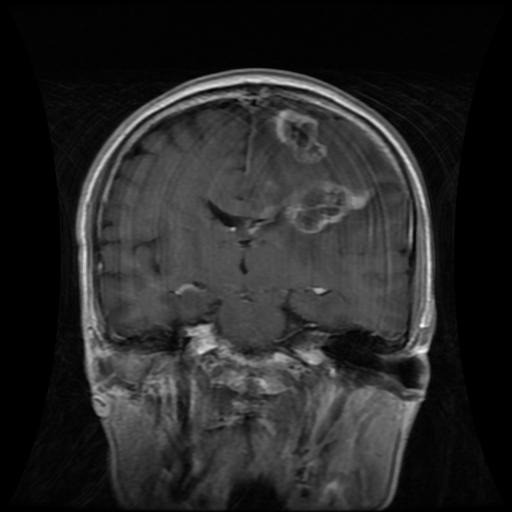

gg (133).jpg


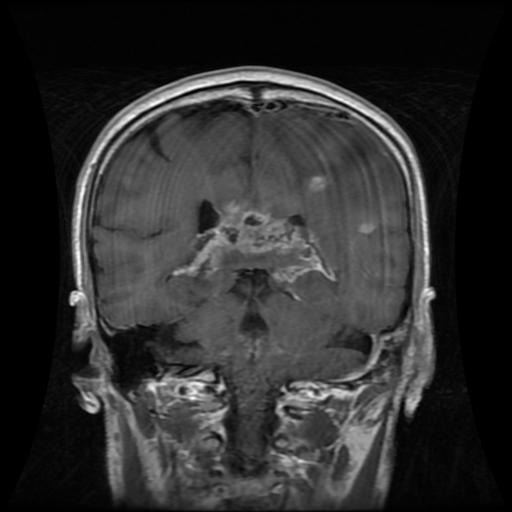

gg (126).jpg


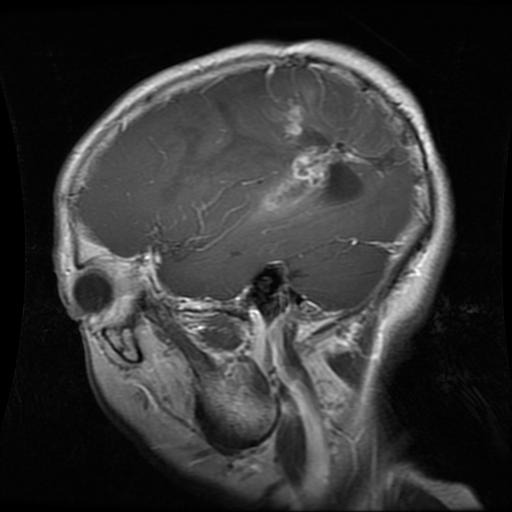

gg (128).jpg


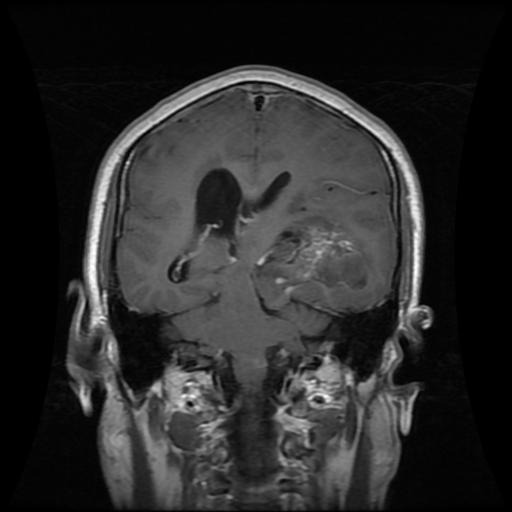

In [6]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/glioma_tumor'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [39]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

NameError: ignored

In [8]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
folders = glob('/content/drive/MyDrive/BrainTumors_Dataset/Training/*')
print(len(folders))

4


In [11]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [14]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2854 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 394 images belonging to 4 classes.


In [28]:
print(len(train_set),len(test_set))

90 13


In [37]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint('brain_tumor_model.h5',
                               verbose=1, save_best_only=True,monitor='val_loss', mode='min')

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=30,callbacks = [checkpoint])
  # steps_per_epoch=50,
  # validation_steps=30)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 1.4887 - accuracy: 0.9124
Epoch 1: val_loss improved from inf to 10.10030, saving model to brain_tumor_model.h5
90/90 [==============================] - 53s 583ms/step - loss: 1.4887 - accuracy: 0.9124 - val_loss: 10.1003 - val_accuracy: 0.7208
Epoch 2/30
90/90 [==============================] - ETA: 0s - loss: 1.5611 - accuracy: 0.9117
Epoch 2: val_loss did not improve from 10.10030
90/90 [==============================] - 53s 588ms/step - loss: 1.5611 - accuracy: 0.9117 - val_loss: 14.4950 - val_accuracy: 0.6954
Epoch 3/30
90/90 [==============================] - ETA: 0s - loss: 1.6318 - accuracy: 0.9071
Epoch 3: val_loss did not improve from 10.10030
90/90 [==============================] - 55s 614ms/step - loss: 1.6318 - accuracy: 0.9071 - val_loss: 13.9243 - val_accuracy: 0.6980
Epoch 4/30
90/90 [==============================] - ETA: 0s - loss: 1.6431 - accuracy: 0.9117
Epoch 4: val_loss did not improve from 10.1

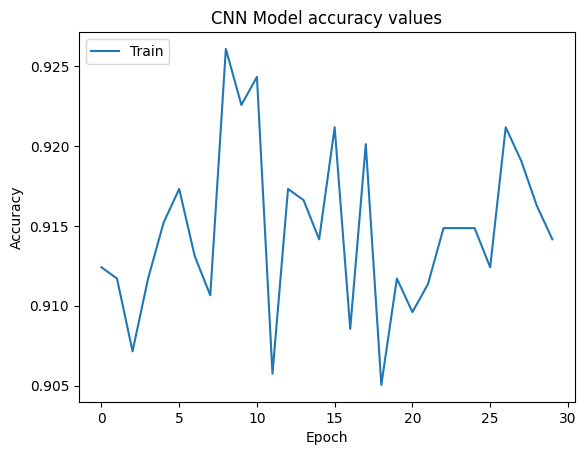

In [38]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [42]:
model = load_model('brain_tumor_model.h5')

In [72]:
import cv2
image=cv2.imread('/content/drive/MyDrive/BrainTumors_Dataset/test/meningioma_tumor/m (4).jpg')
image_resized= cv2.resize(image, (224,224))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
prediction_1 = model.predict(image)
print(prediction_1)

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0.]]


Save file

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save("brain_tumor_model.h5")
model.save("brain_tumor_model.keras")

Download .h5 file

In [ ]:
from google.colab import files
files.download("model1.h5")